In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/survey lung cancer.csv')

In [ ]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
data.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender_encoded'] = le.fit_transform(data['GENDER'])
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,Gender_encoded
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES,0
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES,1
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES,1
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES,1


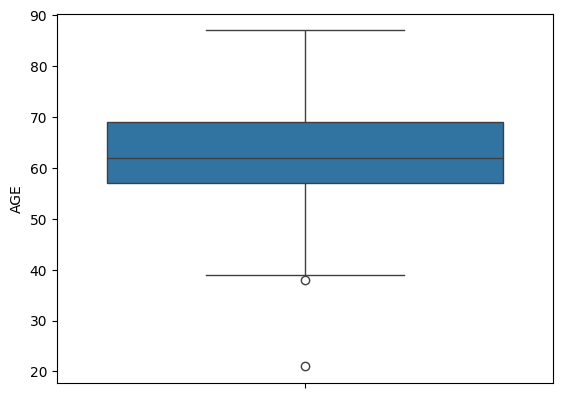

In [ ]:
sns.boxplot(data['AGE'])
plt.show()

In [ ]:
from scipy.stats import zscore
z_scores = zscore(data['AGE'])
data[np.abs(z_scores)>3]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
22,F,21,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
238,F,38,1,2,1,1,2,2,2,2,1,2,2,1,2,YES


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['LUNG_CANCER'] = le.fit_transform(data['LUNG_CANCER'])
data['GENDER'] = le.fit_transform(data['GENDER'])

In [ ]:
x = data.drop('LUNG_CANCER',axis = 1)
y = data['LUNG_CANCER']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=40, n_jobs=-1, max_depth=5, n_estimators=5000, oob_score=True)

In [ ]:
clf.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=5, n_estimators=5000, n_jobs=-1,
                       oob_score=True, random_state=40)

In [ ]:
ypred = clf.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.8709677419354839